# Análise de Agrupamento: Segmentação de Clientes de FoodDelivery

Neste pequeno projeto, iremos analisar o padrão de consumo de um food delivery. Serão analisados os locais, itens consumidos e suas respectivas quantidades, horário de consumo, mês de consumo e por fim, será realizado uma análise de agrupamento pelo algoritmo de k-means.

In [79]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

# Carregando Os Dados

In [2]:
food = pd.read_csv("dataset.csv", encoding = 'utf-8')

# Análise Exploratória

In [3]:
food.shape

(260645, 7)

In [4]:
food.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


### Dicionário dos Dados:

- **id_transacao :** código de identificação da transação;
- **horario_pedido :** horário de realização do pedido;
- **localidade :** região do pedido;
- **nome_item :** produto solicitado;
- **quantidade_item :** quantidade do produto solicitado;
- **latitude e longitude :** coordenadas do local;

In [5]:
food.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [6]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260645 entries, 0 to 260644
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_transacao     260645 non-null  object 
 1   horario_pedido   260645 non-null  object 
 2   localidade       260645 non-null  int64  
 3   nome_item        260645 non-null  object 
 4   quantidade_item  260645 non-null  int64  
 5   latitude         260645 non-null  float64
 6   longitude        260645 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


In [7]:
food.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [8]:
food.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [9]:
food.groupby('id_transacao').mean()

,localidade,quantidade_item,latitude,longitude
id_transacao,,,,
0x10000a,9.0,1.0,41.524598,-87.849468
0x100058,6.0,2.0,41.784576,-87.607565
0x1000c8,9.0,3.5,41.524598,-87.849468
0x10014c,6.0,1.0,41.784576,-87.607565
0x1001d8,2.0,3.0,42.049306,-87.677606
...,...,...,...,...
0xffe96,4.0,4.0,41.889047,-87.803605
0xffeed,2.0,1.0,42.049306,-87.677606
0xfff07,2.0,1.0,42.049306,-87.677606


In [10]:
pivot = food.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')

In [11]:
pivot = pivot.fillna(0).reset_index()

In [12]:
pivot.head()

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0


In [13]:
pivot2 = pivot.merge(food[['id_transacao', 'localidade']])

In [14]:
pivot2.head()

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9


In [15]:
food.head(3)

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.01014
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.01014
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.01014


In [16]:
food['mes'] = food['horario_pedido'].apply(lambda x: time.strftime("%m", time.strptime(x,"%Y-%m-%d %H:%M:%S")))
food['dia'] = food['horario_pedido'].apply(lambda x: time.strftime("%d", time.strptime(x,"%Y-%m-%d %H:%M:%S")))
food['hora'] = food['horario_pedido'].apply(lambda x: time.strftime("%H", time.strptime(x,"%Y-%m-%d %H:%M:%S")))

In [17]:
food.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude,mes,dia,hora
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140,01,16,18
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140,01,16,18
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140,01,16,18
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059,09,04,12
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059,09,04,12


In [18]:
df_pivot = pivot2.merge(food[['id_transacao', 'mes','dia','hora']])

In [19]:
df_pivot.head(10)

,id_transacao,bebida,pizza,salada,sobremesa,localidade,mes,dia,hora
0,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
1,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
2,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
3,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
4,0x100058,0.0,2.0,0.0,2.0,6,05,05,00
5,0x100058,0.0,2.0,0.0,2.0,6,05,05,00
6,0x100058,0.0,2.0,0.0,2.0,6,05,05,00
7,0x100058,0.0,2.0,0.0,2.0,6,05,05,00
8,0x1000c8,4.0,4.0,1.0,5.0,9,01,28,19
9,0x1000c8,4.0,4.0,1.0,5.0,9,01,28,19


In [20]:
df_pivot_idx = df_pivot.reset_index()

In [21]:
df_pivot_idx.head()

,index,id_transacao,bebida,pizza,salada,sobremesa,localidade,mes,dia,hora
0,0,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
1,1,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
2,2,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
3,3,0x10000a,0.0,1.0,0.0,1.0,9,01,29,00
4,4,0x100058,0.0,2.0,0.0,2.0,6,05,05,00


# Análise Descritiva

### Quantidade de Pedidos Por Tipo de Comida

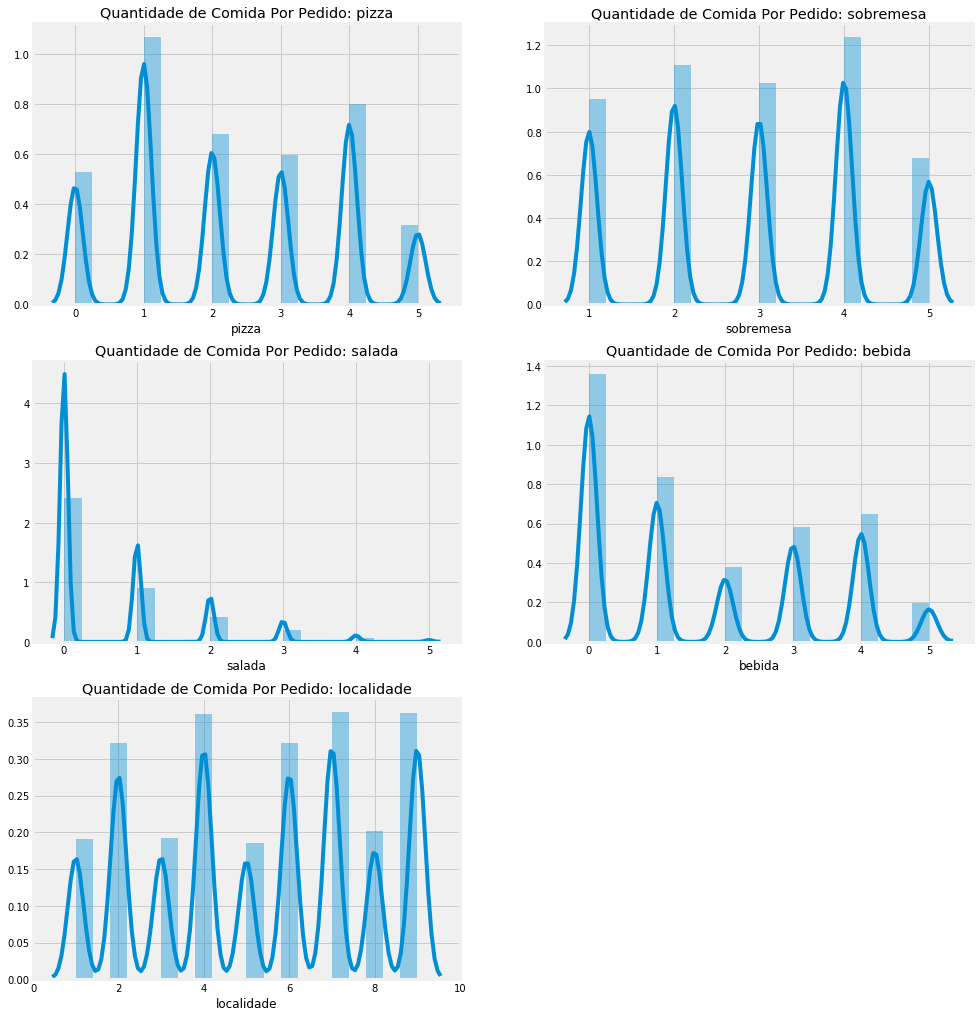

In [22]:
plt.figure(figsize = (15 , 30))

n = 0 

for comida in ['pizza' , 'sobremesa' , 'salada', 'bebida', 'localidade']:
    n = n + 1
    plt.subplot(5 , 2 , n)
    sns.distplot(df_pivot_idx[comida] , bins = 20)
    plt.title('Quantidade de Comida Por Pedido: {}'.format(comida))

plt.show()

### Gráfico de Total de Pedidos Por Localidade

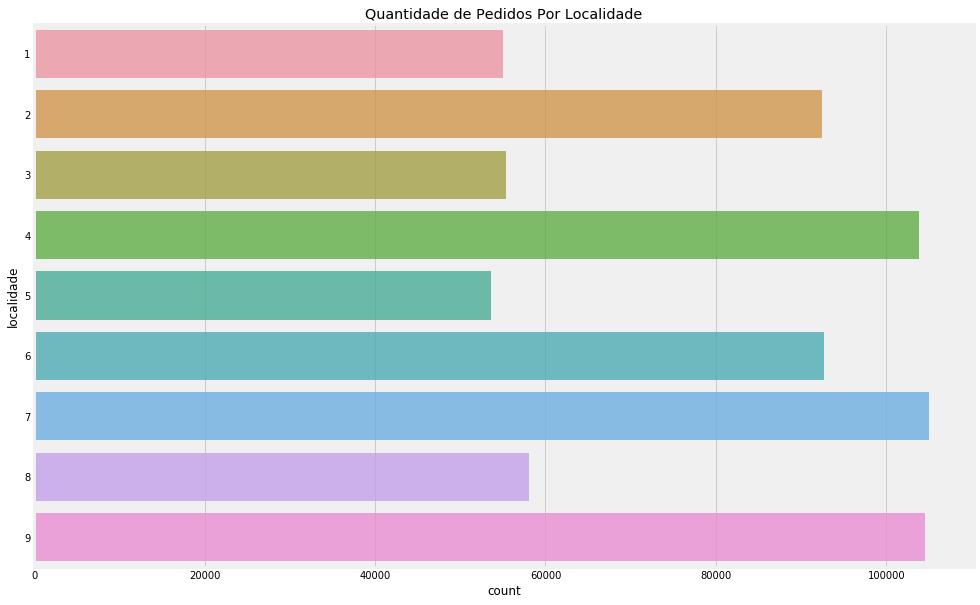

In [23]:
plt.figure(figsize = (15 , 10))
sns.countplot(y = 'localidade' , data = df_pivot_idx,alpha=0.8)
plt.title('Quantidade de Pedidos Por Localidade')
plt.show()

### Relação Entre As Comidas

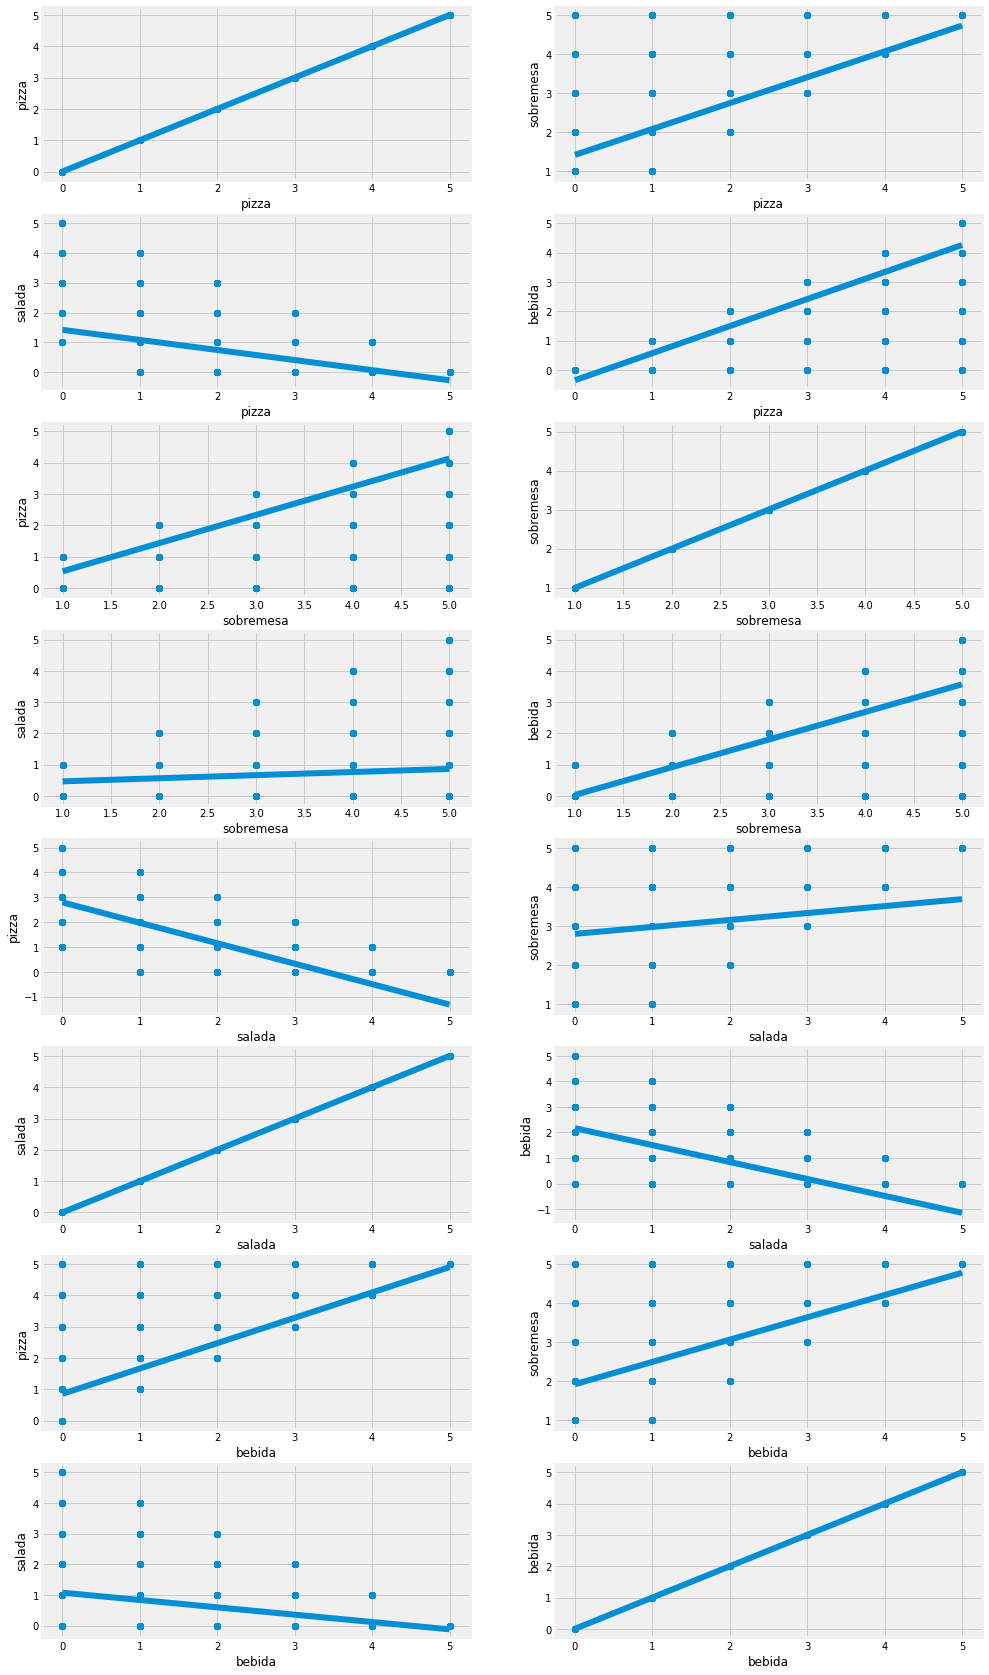

In [51]:
plt.figure(figsize = (15 , 30))

n = 0 

for comida1 in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
    for comida2 in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
        n = n + 1
        plt.subplot(8 , 2 , n)
        sns.regplot(x = comida1 , y = comida2 , data = df_pivot_idx)
        plt.xlabel(comida1)
        plt.ylabel(comida2)
        
plt.show()

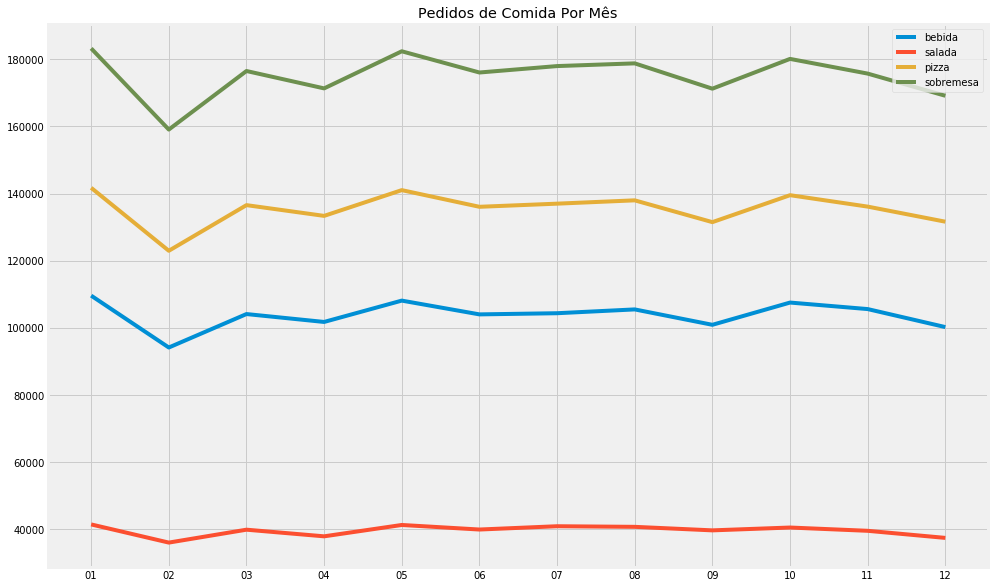

In [24]:
plt.figure(figsize = (15 , 10))

comidaspm = df_pivot.groupby('mes').sum()

plt.plot(comidaspm['bebida'],label='bebida')

plt.plot(comidaspm['salada'],label='salada')

plt.plot(comidaspm['pizza'],label='pizza')

plt.plot(comidaspm['sobremesa'],label='sobremesa')

plt.title('Pedidos de Comida Por Mês')

plt.legend()

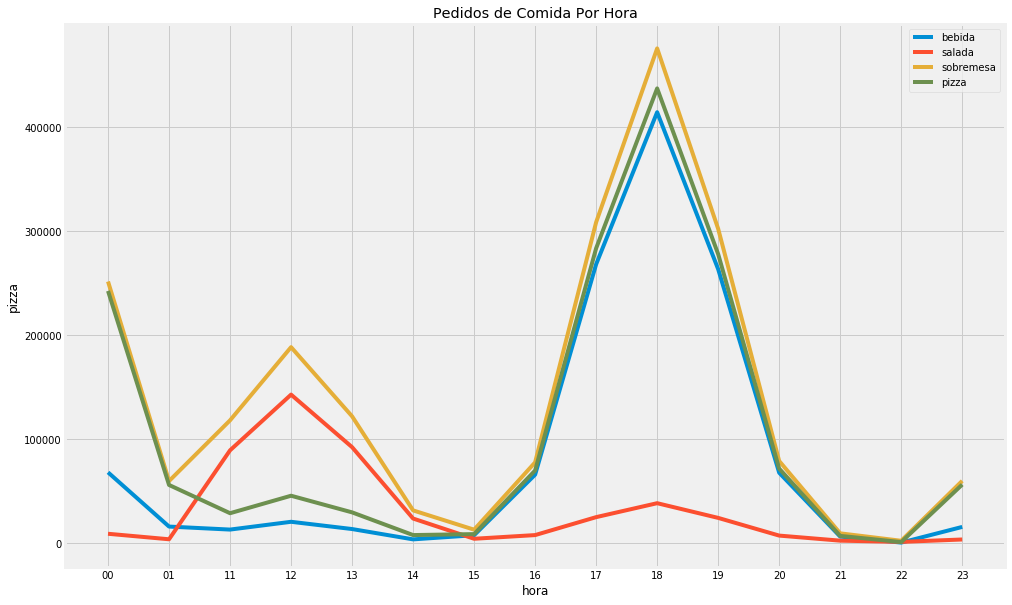

In [25]:
plt.figure(figsize = (15 , 10))

comidasph = df_pivot.groupby('hora').sum()

comidasph = comidasph.reset_index()

sns.lineplot(data=comidasph, x='hora',y='bebida', label='bebida')

sns.lineplot(data=comidasph, x='hora',y='salada', label='salada')

sns.lineplot(data=comidasph, x='hora',y='sobremesa', label='sobremesa')

sns.lineplot(data=comidasph, x='hora',y='pizza', label='pizza')

plt.title('Pedidos de Comida Por Hora')

plt.legend()

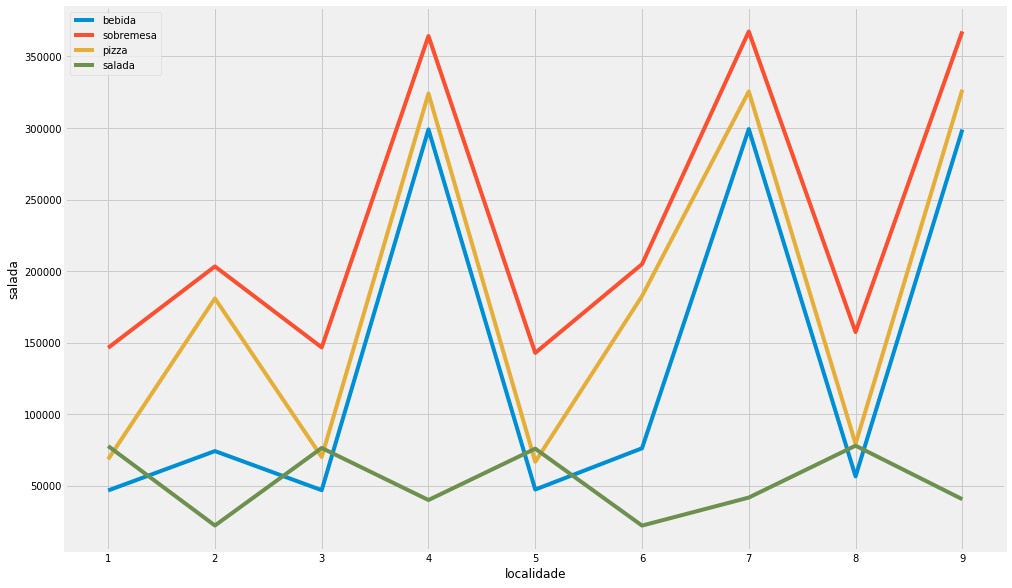

In [26]:
plt.figure(figsize = (15 , 10))

comidaspl = df_pivot.groupby('localidade').sum()
comidaspl = comidaspl.reset_index()

sns.lineplot(data=comidaspl, x='localidade',y='bebida', label='bebida')
sns.lineplot(data=comidaspl, x='localidade',y='sobremesa', label='sobremesa')
sns.lineplot(data=comidaspl, x='localidade',y='pizza', label='pizza')
sns.lineplot(data=comidaspl, x='localidade',y='salada', label='salada')

### Definindo as Variáveis Para Segmentação

In [27]:
data = df_pivot_idx[['bebida', 'pizza', 'sobremesa', 'salada','localidade']]

In [28]:
data.head()

,bebida,pizza,sobremesa,salada,localidade
0,0.0,1.0,1.0,0.0,9
1,0.0,1.0,1.0,0.0,9
2,0.0,1.0,1.0,0.0,9
3,0.0,1.0,1.0,0.0,9
4,0.0,2.0,2.0,0.0,6


# Análise Multivariada: Cluster

Clusterização é um processo de aprendizagem não supervisionada, quando entregamos a um algoritmo de Machine Learning somente os dados de entrada e durante o treinamento, o algoritmo cria um modelo capaz de gerar saídas, nesse caso grupos, ou clusters.

K-Means é provavelmente o algoritmo de agrupamento mais conhecido. Devemos dizer ao algoritmo quantos clusters ele deve encontrar. O conhecimento de negócio na área é importante.

### Análise 1: Pizza e Sobremesa

Vamos realizar nossa primeira segmentação usando 2 variáveis.

In [29]:
X1 = data[['pizza' , 'sobremesa']].iloc[: , :].values
wcss_X1 = []

Muitas vezes, os dados com os quais você trabalha têm várias dimensões, dificultando a visualização. Como consequência, o número ideal de clusters não é muito óbvio. Pode-se representar graficamente a relação entre o número de clusters e a soma dos quadrados dentro do cluster (Within Cluster Sum of Squares - WCSS) e, em seguida, selecionar o número de clusters nos quais a mudança no WCSS começa a se estabilizar (Método Elbow).

In [30]:
for k in range(2, 10):
    
    modelo = (KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 500, random_state = 42, algorithm = 'elkan'))
    
    modelo.fit(X1)
    
    wcss_X1.append(modelo.inertia_)

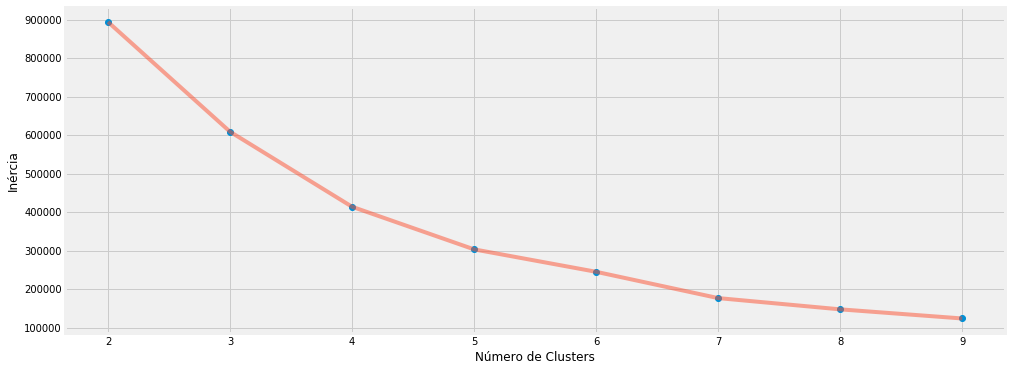

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 10) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 10) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inércia')
plt.show()

O conhecimento de negócio neste momento é crucial. A determinação do número de clusters deve ser embasada nas características analisadas na análise descritiva. O gráfico acima é chamado de Curva de Elbow e normalmente usamos o valor com o menor WCSS. Mas isso deve ser alinhado com as necessidade de negócio, conforme dito anteriormente. Para esse exemplo, não faria sentido usar 10 clusters. Vamos escolher o número de 4 clusters.

In [32]:
modelo_1 = KMeans(n_clusters = 4,  init = 'k-means++', n_init = 10,  max_iter = 500, random_state = 42, algorithm = 'elkan')

In [33]:
modelo_1.fit(X1)

KMeans(algorithm='elkan', max_iter=500, n_clusters=4, random_state=42)

In [34]:
labels1 = modelo_1.labels_
labels1

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [35]:
centroids1 = modelo_1.cluster_centers_
centroids1

array([[0.68458137, 1.33065891],
       [4.05029756, 4.34149802],
       [2.35212635, 2.47891148],
       [0.75337287, 3.46215429]])

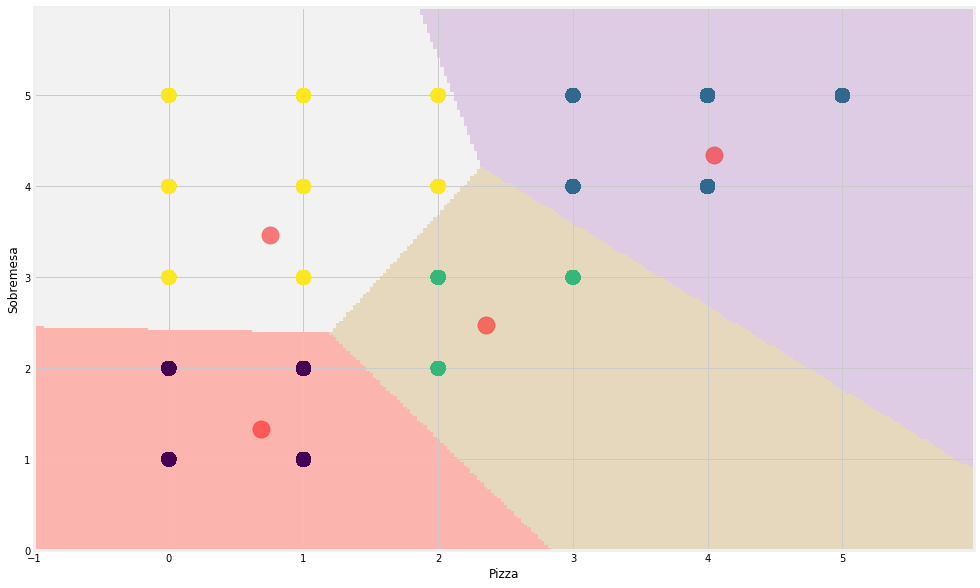

In [36]:
h = 0.025

x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1

y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = modelo_1.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15, 10) )

Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),  cmap = plt.cm.Pastel1, aspect = 'auto', origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'sobremesa', data = data, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

### Interpretação: 

Os pontos vermelho representam os centróides de cada cluster. Podemos notar 4 diferentes tipos de consumidores:
- Rosa: Consumidores que compram pouca pizza e pouca sobremesa;
- Branco: Consumidores que compram muita sobremesa e pouca pizza;
- Roxo: Consumidores que compram muitas pizzas e muitas sobremesas;
- Bege: Consumidores que compram muitas pizzas e sobremesas proporcionalmente;



Como estratégia de Marketing, poderíamos oferecer ao cliente uma sobremesa grátis no caso de comprar mais uma Pizza de maior valor. 

### Análise 2: Pizza e Salada

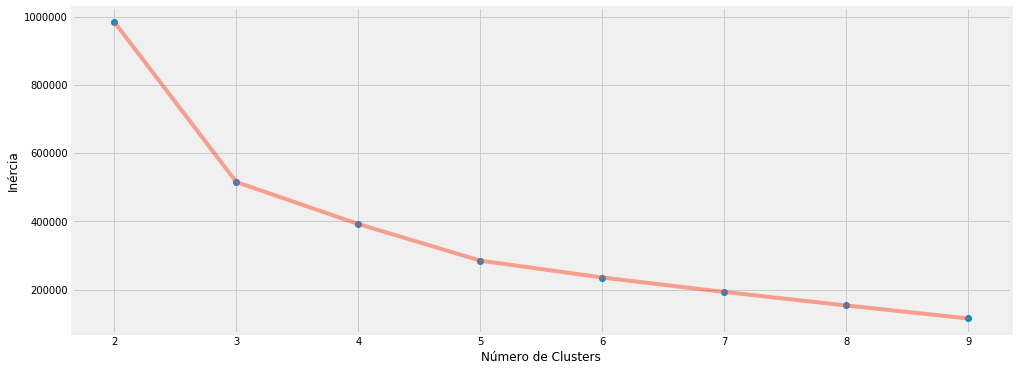

In [37]:
X1 = data[['pizza' , 'salada']].iloc[: , :].values

inertia = []

for n in range(2 , 10):
    
    modelo = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 42, algorithm = 'elkan'))
    
    modelo.fit(X1)
    
    inertia.append(modelo.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 10) , inertia , 'o')
plt.plot(np.arange(2 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inércia')
plt.show()

Vamos criar o modelo com 3 clusters.

In [38]:
modelo_2 = (KMeans(n_clusters = 3, init = 'k-means++', n_init = 10 ,  max_iter = 300,  random_state = 42, algorithm = 'elkan') )

modelo_2.fit(X1)

labels2 = modelo_2.labels_

centroids2 = modelo_2.cluster_centers_

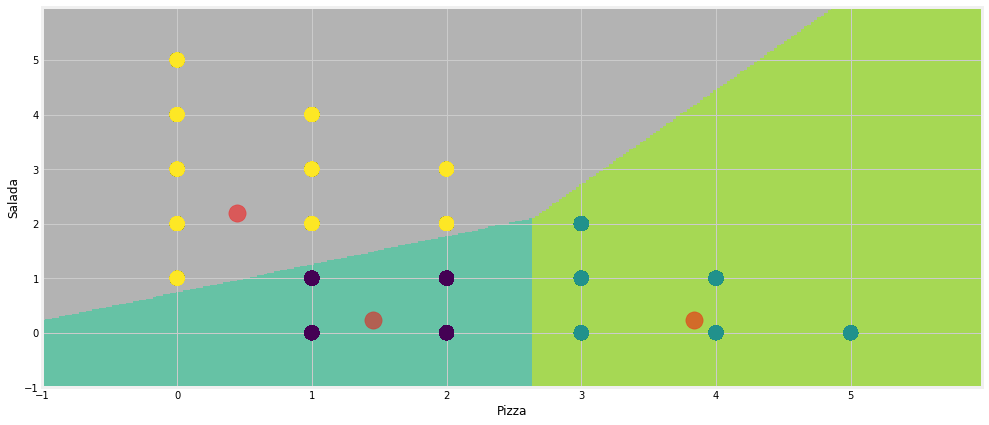

In [39]:
h = 0.025
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_2.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )

Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Set2,aspect = 'auto', origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'salada', data = data, c = labels2, s = 200 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.show()

### Interpretação: 

- Cinza: Consumidores que compram pouca pizza e muita salada;
- Verde Escuro: Consumidores que compram pouca sobremesa e pouca pizza;
- Verde Claro: Consumidores que compram muitas pizzas e poucas sobremesas;

Nota-se uma correlação negativa entre os pedidos de pizza e salada. Sugestão de adicionar ao cardápio pizzas vegetarianas ou "light".

### Análise 3: Pizza e Localidade

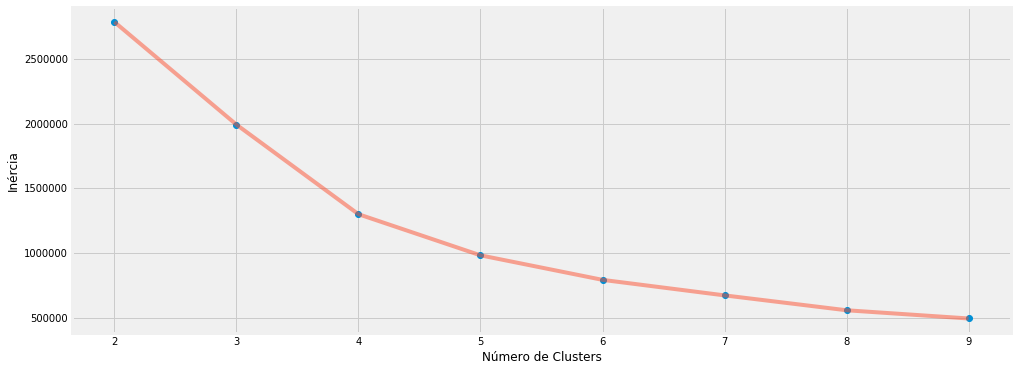

In [40]:
X1 = data[['pizza' , 'localidade']].iloc[: , :].values

inertia = []

for n in range(2 , 10):
    
    modelo = (KMeans(n_clusters = n, init = 'k-means++',n_init = 10, max_iter = 500,random_state = 42, algorithm = 'elkan'))
    
    modelo.fit(X1)
    
    inertia.append(modelo.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 10) , inertia , 'o')
plt.plot(np.arange(2 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inércia')
plt.show()

Vamos criar o modelo com 4 clusters.

In [41]:
modelo_3 = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10 , max_iter = 500, random_state = 42, algorithm = 'elkan') )

modelo_3.fit(X1)

labels3 = modelo_3.labels_

centroids3 = modelo_3.cluster_centers_

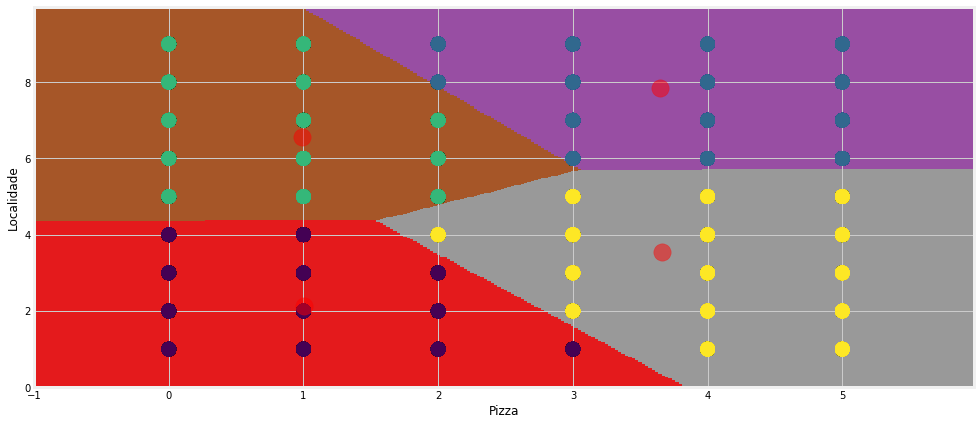

In [42]:
h = 0.025
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_3.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )

Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation = 'nearest',extent = (xx.min(), xx.max(), yy.min(), yy.max()),  cmap = plt.cm.Set1, aspect = 'auto', origin = 'lower')

plt.scatter( x = 'pizza', y = 'localidade', data = data, c = labels3, s = 200 )

plt.scatter(x = centroids3[: , 0], y =  centroids3[: , 1], s = 300, c = 'red', alpha = 0.5)

plt.xlabel('Pizza')

plt.ylabel('Localidade')

plt.show()

### Análise:

Com a finalidade de aumentar as vendas, teríamos que investigar mais a fundo os pedidos dos clusters à esquerda do gráfico e compreender em mais detalhes as características desses pedidos e que tipo de oferta podemos fazer.

### Análise 4 - Pizza, Salada, Sobremesa, Bebida e Localidade


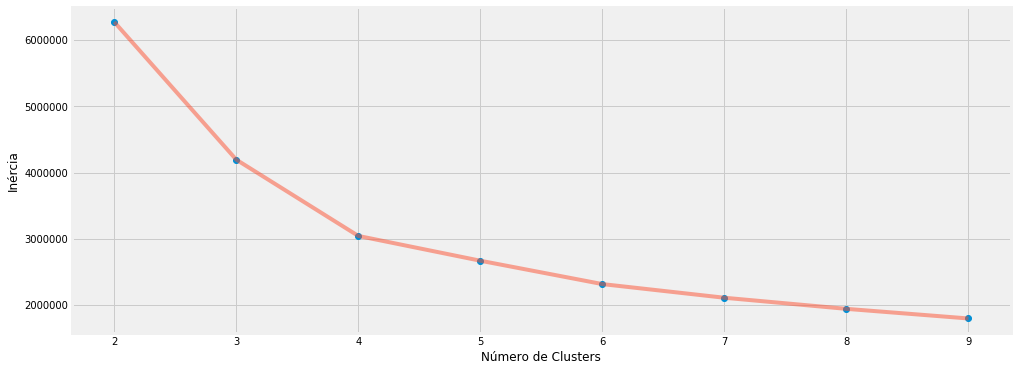

In [55]:
# Usaremos três variáveis
X1 = data.iloc[: , :].values

# Lista de valores de Inertia (Inertia e WCSS são a mesma coisa)
inertia = []

# Loop para testar os valores de K
for n in range(2 , 10):
    
    modelo = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 500, random_state = 42,  algorithm = 'elkan'))
    
    modelo.fit(X1)
    
    inertia.append(modelo.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 10) , inertia , 'o')
plt.plot(np.arange(2 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inércia')
plt.show()

Vamos Escolher 4 Clusters

In [56]:
modelo_4 = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10 , max_iter = 500, random_state = 42 , algorithm = 'elkan') )
modelo_4.fit(X1)
labels4 = modelo_4.labels_
centroids4 = modelo_4.cluster_centers_

In [57]:
labels4

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [58]:
centroids4

array([[0.49019119, 1.11108682, 2.07722496, 0.96613814, 2.29340505],
       [0.54820836, 1.12679873, 2.06306854, 0.93626981, 6.70426833],
       [3.37795974, 3.86387929, 4.112493  , 0.2486137 , 3.49829797],
       [3.42593549, 3.81315555, 4.0772606 , 0.26410504, 7.83627497]])

Salvando dados no dataframe:

In [61]:
data['cluster'] = labels4
df_pivot_idx['cluster'] = labels4

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
data.head()

,bebida,pizza,sobremesa,salada,localidade,cluster
0,0.0,1.0,1.0,0.0,9,1
1,0.0,1.0,1.0,0.0,9,1
2,0.0,1.0,1.0,0.0,9,1
3,0.0,1.0,1.0,0.0,9,1
4,0.0,2.0,2.0,0.0,6,1
